In [18]:
## Read polygons from file and apply as gee geometries
import fiona
from shapely.geometry import shape, MultiPolygon, MultiPoint, Polygon, Point
import glob

# current working directory
import os
cwd = os.getcwd()

# find files in shapefile folder
shape_file_path = '/media/chris/Data/GreenCityWatch/data/Ground_truth/*.shp'
shape_files = glob.glob(shape_file_path)
path = shape_files[1]

shape_files, cwd, path

(['/media/chris/Data/GreenCityWatch/data/Ground_truth/Cambridge_trees_UTM.shp',
  '/media/chris/Data/GreenCityWatch/data/Ground_truth/Cambridge_trees_WGS.shp',
  '/media/chris/Data/GreenCityWatch/data/Ground_truth/MIT_trees_WGS.shp',
  '/media/chris/Data/GreenCityWatch/data/Ground_truth/OTM.shp',
  '/media/chris/Data/GreenCityWatch/data/Ground_truth/MIT_trees_UTM.shp',
  '/media/chris/Data/GreenCityWatch/data/Ground_truth/LiDAR_based_cambridge_merged.shp',
  '/media/chris/Data/GreenCityWatch/data/Ground_truth/LiDAR_based_within_buffer_UTM.shp',
  '/media/chris/Data/GreenCityWatch/data/Ground_truth/LiDAR_based_cambridge_merged_UTM.shp',
  '/media/chris/Data/GreenCityWatch/data/Ground_truth/LiDAR_based_within_buffer_UTM_N18NAD84.shp'],
 '/home/chris/Documents/GreenCityWatch/GCW_toolkit/misc',
 '/media/chris/Data/GreenCityWatch/data/Ground_truth/Cambridge_trees_WGS.shp')

In [20]:
shp_AOIs = MultiPoint([shape(pol['geometry']) for pol in fiona.open(path)])

In [22]:
len(shp_AOIs)

34060

In [8]:
from pprint import pprint

In [27]:
diameters = []

for point in fiona.open(path):

    diameter = point['properties']['diameter']
    diameters.append(diameter)

In [36]:
import numpy as np
diameters = np.array(diameters)

(array([2.1445e+04, 7.7560e+03, 3.4030e+03, 1.0000e+03, 3.2000e+02,
        1.0500e+02, 1.8000e+01, 2.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([ 0. ,  8.6, 17.2, 25.8, 34.4, 43. , 51.6, 60.2, 68.8, 77.4, 86. ]),
 <a list of 10 Patch objects>)

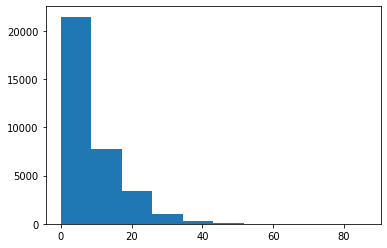

In [37]:
import matplotlib.pyplot as plt

plt.hist(diameters[diameters < 94])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0084161110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0084161bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f008415c450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0084168650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0084168b50>],
 'means': []}

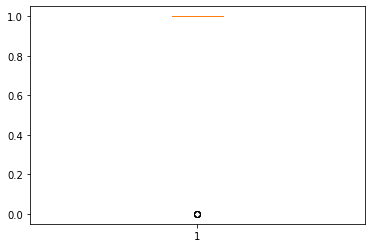

In [42]:
plt.boxplot(diameters < 100)

(array([2.6004e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.0000e-01, 9.4590e+01, 1.8908e+02, 2.8357e+02, 3.7806e+02,
        4.7255e+02, 5.6704e+02, 6.6153e+02, 7.5602e+02, 8.5051e+02,
        9.4500e+02]),
 <a list of 10 Patch objects>)

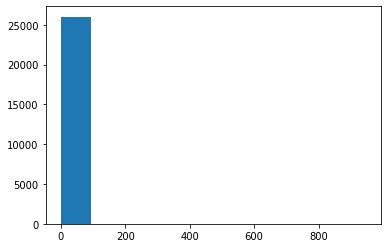

In [50]:
plt.hist(diameters[diameters != 0])